In [1]:
state = 'ID' 
year = 2020
obj_type = 'average_Polsby_Popper'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ID has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from ID_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 154 plans from file.


In [6]:
from pareto import filter_and_sort_pareto
from metrics import scores

plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
_,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
print(f"Selected {len(nondominated_warm_starts_plans)} nondominated warm start plans")

Selected 10 nondominated warm start plans


In [7]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 910358 and U = 928748 and k = 2.

****************************************
Trying deviation = 9195.53
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 11, 12, 15, 19, 20, 21, 28, 35, 41], [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43]]
Objective value: 0.33410210632775506
Deviation: 4796.0

****************************************
Running labeling model!
****************************************
L = 910358 and U = 928748
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 72

     0     0    0.93899    0  114    0.29923    0.93899   214%     -    1s
     0     2    0.93899    0  114    0.29923    0.93899   214%     -    1s
*  707   117              20       0.3046865    0.66633   119%  79.0    3s
*  715   117              24       0.3051748    0.66633   118%  78.3    3s
*  777   109              30       0.3052969    0.53120  74.0%  77.4    3s
H  903    93                       0.3077078    0.42980  39.7%  73.6    3s
H  914    93                       0.3106680    0.42980  38.3%  73.9    3s
*  950    93              24       0.3115225    0.42980  38.0%  73.1    3s
H 1060    82                       0.3119802    0.42299  35.6%  69.2    3s
H 1068    82                       0.3205690    0.42299  32.0%  69.1    3s
* 1249    12              40       0.3210497    0.34987  8.98%  62.8    3s
* 1328     0              38       0.3210502    0.32106  0.00%  60.0    3s
* 1341     0              41       0.3210511    0.32106  0.00%  59.4    3s

Cutting planes:
  Gomory

Variable types: 310 continuous, 828 integer (828 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-07, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]

User MIP start produced solution with objective 0.239415 (0.03s)
User MIP start produced solution with objective 0.270665 (0.04s)
User MIP start produced solution with objective 0.299234 (0.04s)
Loaded user MIP start with objective 0.299234

Presolve removed 790 rows and 522 columns
Presolve time: 0.02s
Presolved: 650 rows, 616 columns, 2432 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 46 continuous, 570 integer (570 binary)

Root relaxation: objective 9.999990e-01, 144 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   19    0.29923    1.00

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1440 rows, 1138 columns and 4741 nonzeros
Model fingerprint: 0x34d3869f
Model has 2 quadratic constraints
Variable types: 310 continuous, 828 integer (828 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-07, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]

User MIP start produced solution with objecti

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1440 rows, 1138 columns and 4741 nonzeros
Model fingerprint: 0xfbb4ec79
Model has 2 quadratic constraints
Variable types: 310 continuous, 828 integer (828 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-07, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]

User MIP start produced solution with objecti

Selected warm_start = [[1, 5, 10, 15, 16, 18, 19, 20, 22, 26, 29, 30, 33, 34, 38, 43], [0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 17, 21, 23, 24, 25, 27, 28, 31, 32, 35, 36, 37, 39, 40, 41, 42]]
Objective value: 0.13368872817760816
Deviation: 2.0

****************************************
Running labeling model!
****************************************
L = 919549 and U = 919557
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit 

 584040 83010    0.18343   47   19    0.13369    0.18538  38.7%  22.5  285s
 595391 84277 infeasible   50         0.13369    0.18529  38.6%  22.4  291s
 602676 85270    0.18413   48   43    0.13369    0.18522  38.5%  22.4  295s
 613004 86285 infeasible   53         0.13369    0.18515  38.5%  22.3  300s
 621318 87349 infeasible   49         0.13369    0.18508  38.4%  22.2  305s
 629463 88244 infeasible   56         0.13369    0.18501  38.4%  22.1  310s
 639928 89259 infeasible   52         0.13369    0.18493  38.3%  22.0  316s
 645031 89748 infeasible   54         0.13369    0.18489  38.3%  22.0  320s
 652205 90485 infeasible   53         0.13369    0.18483  38.3%  21.9  325s
 661621 91329    0.15393   48   21    0.13369    0.18476  38.2%  21.8  331s
 669048 91981    0.16136   51   52    0.13369    0.18470  38.2%  21.8  336s
 675143 92799    0.14015   53   31    0.13369    0.18464  38.1%  21.7  341s
 685900 93133 infeasible   53         0.13369    0.18455  38.0%  21.6  345s
 693138 9395

 1629070 46282 infeasible   52         0.13369    0.15086  12.8%  18.8  820s
 1642290 43398    0.14844   52   40    0.13369    0.14844  11.0%  18.8  825s
 1656908 41250 infeasible   49         0.13369    0.14790  10.6%  18.7  830s
 1669410 38164    0.14062   56   18    0.13369    0.14673  9.75%  18.7  835s
 1681259 36094     cutoff   48         0.13369    0.14415  7.82%  18.7  840s
 1693798 34649    0.14062   45   29    0.13369    0.14415  7.82%  18.7  845s
 1704175 33348    0.14032   53   45    0.13369    0.14415  7.82%  18.7  850s
 1715355 32304    0.13929   49   36    0.13369    0.14415  7.82%  18.7  856s
 1725528 31265 infeasible   52         0.13369    0.14415  7.82%  18.7  860s
 1739550 29351 infeasible   54         0.13369    0.14415  7.82%  18.7  865s
 1749351 27579 infeasible   51         0.13369    0.14415  7.82%  18.7  870s
 1761674 24844    0.13904   50   25    0.13369    0.14415  7.82%  18.7  875s
 1773201 22190 infeasible   48         0.13369    0.14415  7.82%  18.6  880s

 244862 49301    0.21477   46   35    0.12728    0.21875  71.9%  21.4   65s
 259229 50485    0.21614   45   48    0.12728    0.21741  70.8%  21.3   70s
 277992 51740 infeasible   43         0.12728    0.21640  70.0%  21.3   75s
 289802 52957    0.15541   54   36    0.12728    0.21570  69.5%  21.4   80s
 305582 54069 infeasible   46         0.12728    0.21493  68.9%  21.5   85s
 321670 55185 infeasible   52         0.12728    0.21408  68.2%  21.5   90s
 332514 55584    0.15408   48   21    0.12728    0.21329  67.6%  21.6   95s
 347641 55815    0.15271   46   37    0.12728    0.21159  66.2%  21.5  100s
 361725 56581    0.15388   48   28    0.12728    0.20611  61.9%  21.7  105s
 375399 56493    0.17042   49   21    0.12728    0.20205  58.8%  21.8  110s
 389364 56168 infeasible   51         0.12728    0.19998  57.1%  21.9  115s
 402725 55756 infeasible   44         0.12728    0.19436  52.7%  22.0  120s
 417408 57732    0.16400   53   23    0.12728    0.18750  47.3%  22.2  125s
 430780 6111

 1549693 112593 infeasible   58         0.12728    0.17284  35.8%  17.5  600s
 1560363 112107    0.13463   56   42    0.12728    0.17284  35.8%  17.4  606s
 1570949 111667    0.13195   47   45    0.12728    0.17284  35.8%  17.4  611s
 1580697 111170 infeasible   55         0.12728    0.17284  35.8%  17.4  615s
 1591707 110331    0.13630   49   32    0.12728    0.17284  35.8%  17.4  620s
 1601439 109582    0.13054   54   43    0.12728    0.17284  35.8%  17.4  625s
 1614032 108630 infeasible   47         0.12728    0.17284  35.8%  17.4  630s
 1623910 107916    0.13740   54   49    0.12728    0.17284  35.8%  17.4  635s
 1635836 107015    0.15405   48   62    0.12728    0.17284  35.8%  17.3  640s
 1646153 106004    0.13910   50   25    0.12728    0.17284  35.8%  17.3  645s
 1656192 105140    0.13935   53   38    0.12728    0.17284  35.8%  17.3  650s
 1667250 103879    0.15304   53   29    0.12728    0.17284  35.8%  17.3  655s
 1679374 102388 infeasible   52         0.12728    0.17284  35.8

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
epsilon = 1 / (2 * G._k)
min_deviation = min(round(r[2], 1) for r in result)

if min_deviation < epsilon:
    no_solution_region = None
else:
    no_solution_region = [0, min_deviation]

if no_solution_region is not None:
    print(f"No feasible solution was found within the region: {no_solution_region}")


####################################################################################################
Pareto Frontier for state ID,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[1, 5, 12, 19, 20, 21, 22, 34, 35, 38, 40, 41, 43], [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 39, 42]], [[1, 5, 10, 15, 16, 18, 19, 20, 22, 26, 29, 30, 33, 34, 38, 43], [0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 17, 21, 23, 24, 25, 27, 28, 31, 32, 35, 36, 37, 39, 40, 41, 42]], [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]], [[1, 2, 11, 12, 15, 20, 21, 35, 41], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43]], [[1, 2, 3, 5, 10, 11, 15

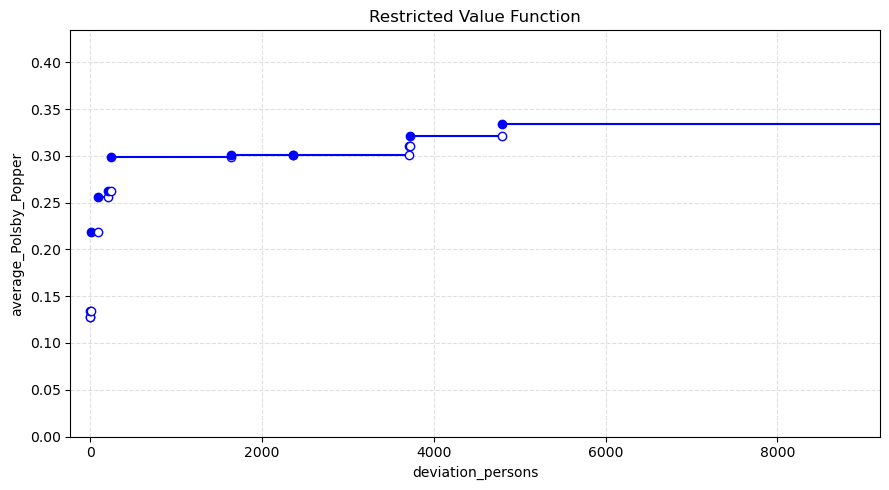

In [10]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             )


####################################################################################################
Pareto maps for state ID, objective average_Polsby_Popper
####################################################################################################



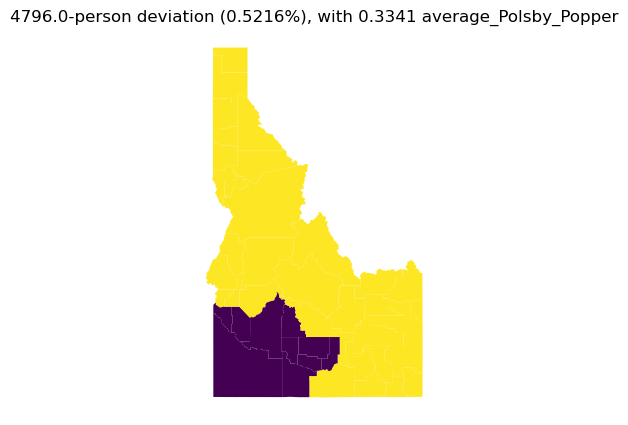

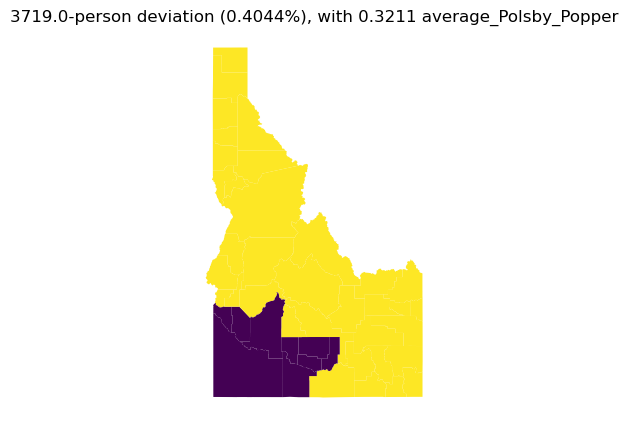

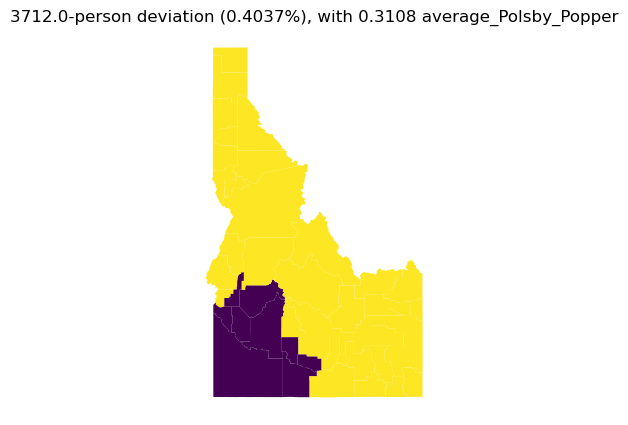

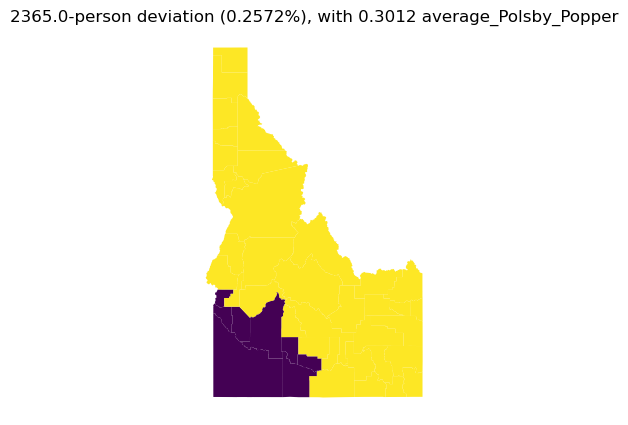

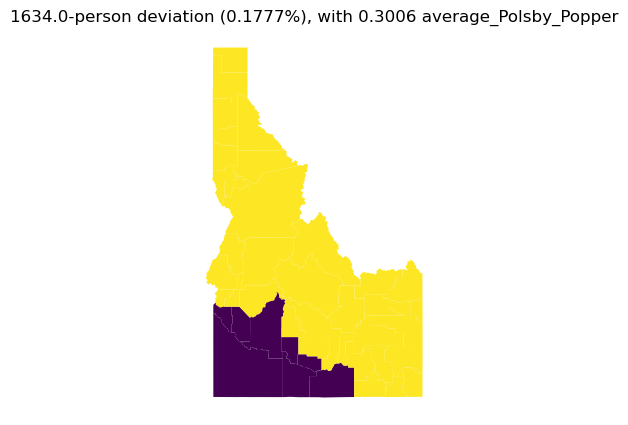

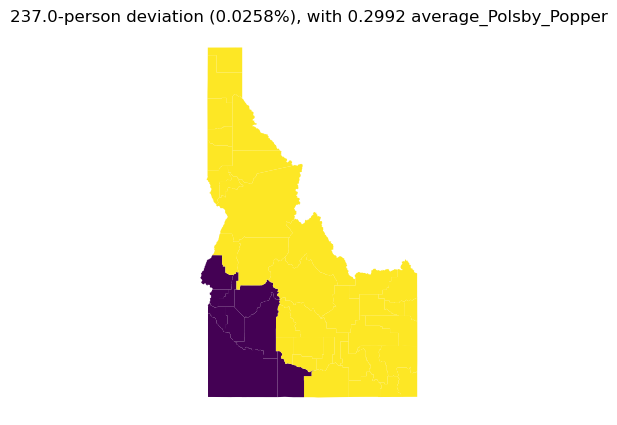

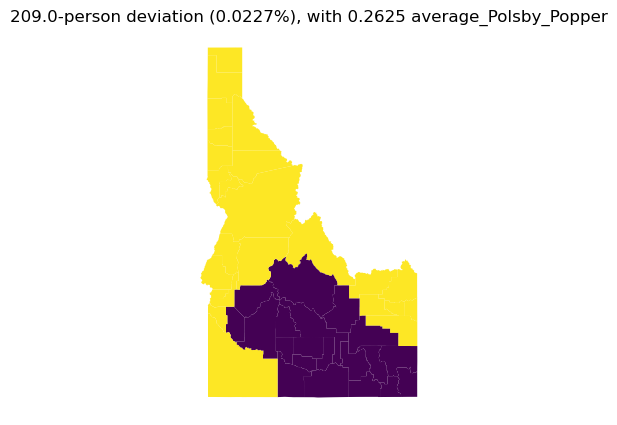

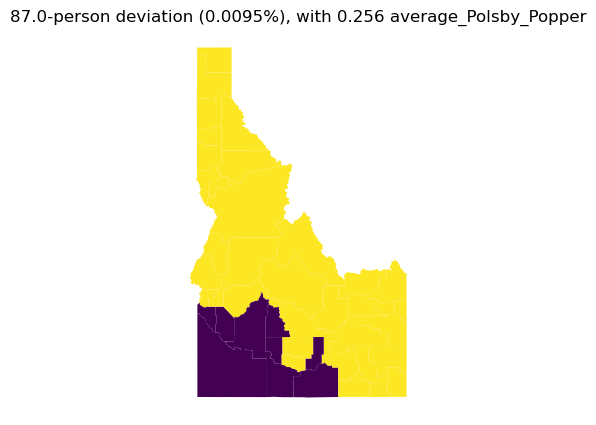

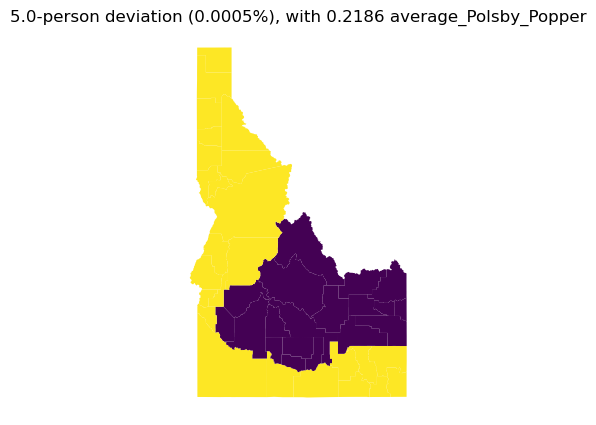

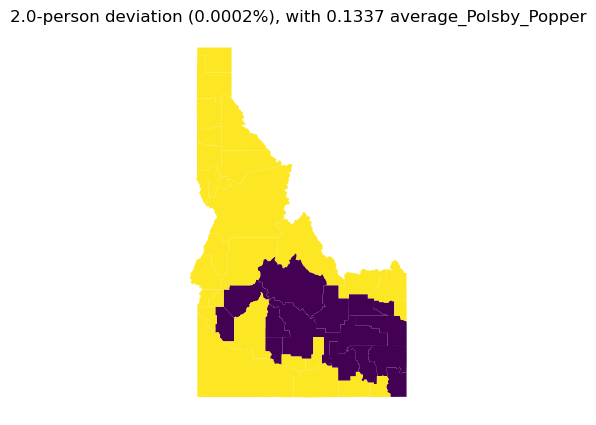

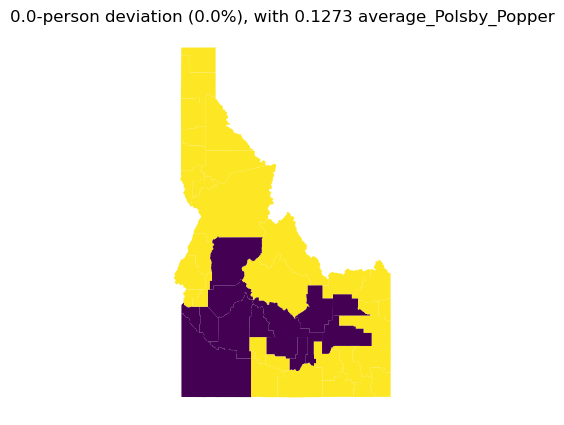

In [11]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)